In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sklearn linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Data Preparation

In [2]:
main_data = pd.read_csv('data/steam.csv')
main_data.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
sentiment_scores = pd.read_csv('data/sentiment_scores.csv')
sentiment_scores.head(5)

,appid,sentiment_score
0,10,0.372587
1,20,0.384973
2,30,0.369761
3,40,0.354543
4,50,0.443567


In [4]:
#Make an inner join on the two dataframes
df = pd.merge(main_data, sentiment_scores, on='appid', how='inner')
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,sentiment_score
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,0.372587
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0.384973
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0.369761
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0.354543
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0.443567


In [5]:
#Split owners values to get the minimum and maximum values
df[['first_value', 'second_value']] = df["owners"].str.split("-", expand=True)

# Make the columns to numeric value
df['first_value'] = pd.to_numeric(df['first_value'])
df['second_value'] = pd.to_numeric(df['second_value'])

#Calculate the average of the owners column
df['owners'] = (df['first_value'] + df['second_value']) / 2

#Drop the first_value and second_value columns
df = df.drop(columns=['first_value', 'second_value'])

df["owners"]

0       15000000.0
1        7500000.0
2        7500000.0
3        7500000.0
4        7500000.0
           ...    
8642       35000.0
8643       10000.0
8644       10000.0
8645       10000.0
8646       10000.0
Name: owners, Length: 8647, dtype: float64

In [6]:
#Create genres; categories; steamspy_tags 2 columns where its only maint the first value of the list
df['genres'] = df['genres'].str.split(';').str[0]
df['categories'] = df['categories'].str.split(';').str[0]
df['steamspy_tags'] = df['steamspy_tags'].str.split(';').str[0]
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,sentiment_score
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action,0,124534,3339,17612,317,15000000.0,7.19,0.372587
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action,0,3318,633,277,62,7500000.0,3.99,0.384973
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,FPS,0,3416,398,187,34,7500000.0,3.99,0.369761
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action,0,1273,267,258,184,7500000.0,3.99,0.354543
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS,0,5250,288,624,415,7500000.0,3.99,0.443567


In [7]:
df.to_csv('data/merged_data.csv', index=False)

In [8]:
#apply log transformation to the numerical columns
df[['positive_ratings','negative_ratings' , 'average_playtime', 'median_playtime', 'owners', 'price']] = np.log1p(df[['positive_ratings','negative_ratings' , 'average_playtime', 'median_playtime', 'owners', 'price']])

Regresion Analysis

In [9]:
##Make a linear regresion to understand the relationship between the postitve ranking and the numerical features

# Definir las variables dependiente e independientes
X = df[['average_playtime', 'median_playtime', 'owners', 'price']]  # Variables independientes
y = df['sentiment_score']  # Variable dependiente

# Añadir una constante para el intercepto (equivalente a la columna de unos en R)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)  # OLS = Ordinary Least Squares
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

#Average playtime and owners most significant variables

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     14.31
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.19e-11
Time:                        23:19:21   Log-Likelihood:                -259.52
No. Observations:                8647   AIC:                             529.0
Df Residuals:                    8642   BIC:                             564.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4248      0.024  

Constante:
Valor: 0.4248
Representa el valor esperado de la variable dependiente cuando todas las variables independientes son 0. Es estadísticamente significativo (p < 0.05), indicando que el modelo predice un valor base relevante.

average_playtime:
Coeficiente: -0.0189
Por cada aumento de una unidad en el tiempo promedio de juego, la variable dependiente disminuye en 0.0189 unidades, manteniendo las demás constantes.
Es estadísticamente significativo (p = 0.014 < 0.05), sugiriendo que tiene un efecto negativo pero pequeño en la variable dependiente.

median_playtime:
Coeficiente: 0.0161
Por cada aumento de una unidad en el tiempo mediano de juego, la variable dependiente aumenta en 0.0161 unidades, manteniendo las demás constantes.
Es estadísticamente significativo (p = 0.032 < 0.05), indicando un efecto positivo moderado.

owners:
Coeficiente: -0.0021
Por cada aumento de una unidad en el número de propietarios, la variable dependiente disminuye en 0.0021 unidades.
No es estadísticamente significativo (p = 0.368 > 0.05), lo que sugiere que no tiene un impacto claro.

price:
Coeficiente: 0.0186
Por cada aumento de una unidad en el precio, la variable dependiente aumenta en 0.0186 unidades, manteniendo las demás constantes.
Es altamente significativo (p < 0.001), lo que indica un impacto positivo claro y notable.

Sentimental Score trends

In [10]:
#Group by genre and calculate the average of the sentiment score
df_grouped = df.groupby('categories')['sentiment_score'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='sentiment_score', ascending=False)
df_grouped

,categories,sentiment_score
15,Steam Cloud,0.780741
17,Steam Trading Cards,0.685775
1,Co-op,0.607011
4,Includes Source SDK,0.600225
0,Captions available,0.555526
6,Local Multi-Player,0.554199
19,VR Support,0.535185
10,Partial Controller Support,0.533396
14,Steam Achievements,0.523384
16,Steam Leaderboards,0.516335


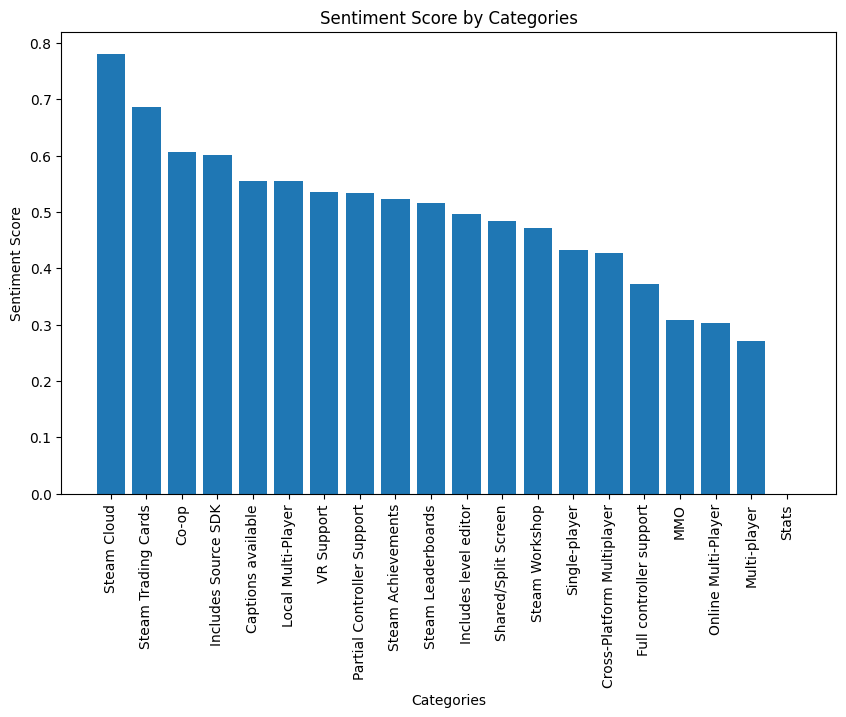

In [11]:
#Bar char to show the sentiment score by category
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['categories'], df_grouped['sentiment_score'])
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Categories')
plt.show()

In [12]:
#Group by genre and calculate the average of the sentiment score
df_grouped = df.groupby('genres')['sentiment_score'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='sentiment_score', ascending=False)
df_grouped

,genres,sentiment_score
6,Design & Illustration,0.710822
23,Web Publishing,0.622428
12,Massively Multiplayer,0.558180
2,Adventure,0.532854
4,Audio Production,0.523671
3,Animation & Modeling,0.489994
5,Casual,0.488125
14,Photo Editing,0.478270
15,RPG,0.466746
17,Sexual Content,0.456441


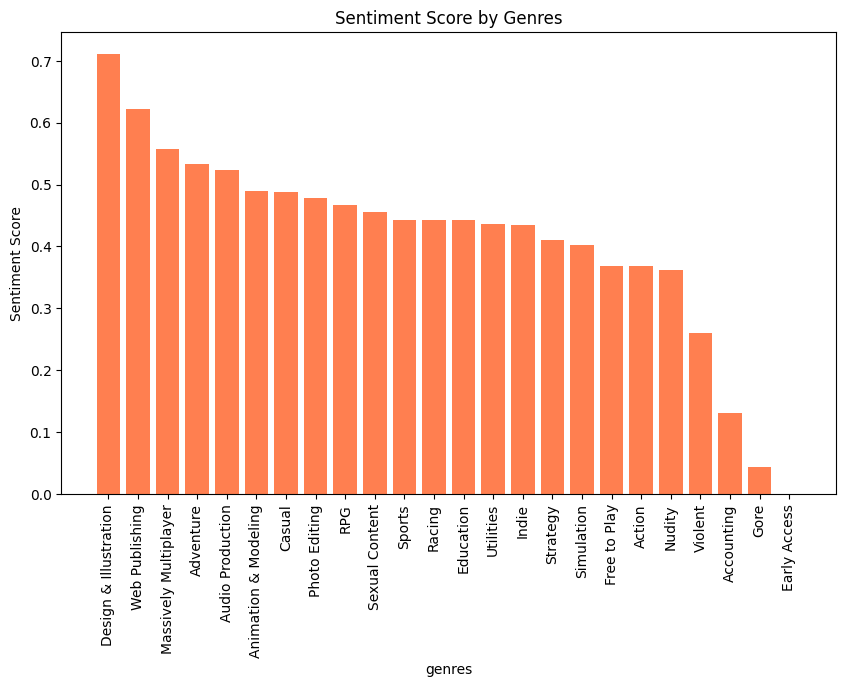

In [13]:
#Bar char to show the sentiment score by category
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['genres'], df_grouped['sentiment_score'], color='coral')
plt.xticks(rotation=90)
plt.xlabel('genres')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Genres')
plt.show()